In [18]:
MAX, MIN = 1000, -1000 
def minimax(depth, nodeIndex, maximizer, values, alpha, beta): 
    if depth == 3: 
        return values[nodeIndex] 
    if maximizer: 
        best = MIN
        for i in range(0, 2):    
            val = minimax(depth + 1, nodeIndex * 2 + i, False, values, alpha, beta) 
            best = max(best, val) 
            alpha = max(alpha, best) 
            if beta <= alpha: 
                break
        return best 
    else:
        best = MAX
     for i in range(0, 2): 
         val = minimax(depth + 1, nodeIndex * 2 + i, True, values, alpha, beta) 
            best = min(best, val) 
            beta = min(beta, best) 
            if beta <= alpha: 
                break
        return best 
if __name__ == "__main__": 
    values = [2, 3, 5, 9, 0, 1, 7, 5]  
    print("The optimal value is :", minimax(0, 0, True, values, MIN, MAX))

The optimal value is : 3


In [2]:
pip install networkx matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


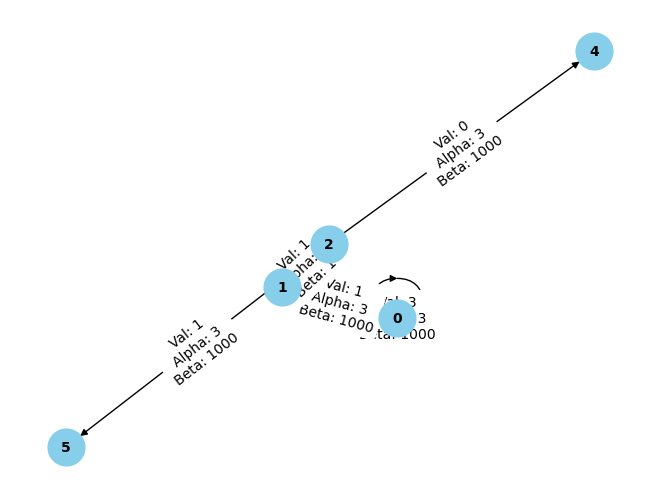

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

MAX, MIN = 1000, -1000

def minimax(depth, nodeIndex, maximizer, values, alpha, beta, G): 
    if depth == 3: 
        return values[nodeIndex] 

    if maximizer: 
        best = MIN
        for i in range(2): 
            val = minimax(depth + 1, nodeIndex * 2 + i, False, values, alpha, beta, G)
            best = max(best, val)
            alpha = max(alpha, best)

            G.add_edge(nodeIndex, nodeIndex * 2 + i, label=f"Val: {val}\nAlpha: {alpha}\nBeta: {beta}")
            
            if beta <= alpha:
                break
        return best 

    else:
        best = MAX
        for i in range(2): 
            val = minimax(depth + 1, nodeIndex * 2 + i, True, values, alpha, beta, G)
            best = min(best, val)
            beta = min(beta, best)

            G.add_edge(nodeIndex, nodeIndex * 2 + i, label=f"Val: {val}\nAlpha: {alpha}\nBeta: {beta}")
            
            if beta <= alpha:
                break
        return best 

if __name__ == "__main__": 
    values = [2, 3, 5, 9, 0, 1, 7, 5]  
    G = nx.DiGraph()

    minimax(0, 0, True, values, MIN, MAX, G)

    pos = nx.spring_layout(G)
    labels = nx.get_edge_attributes(G, 'label')
    
    nx.draw(G, pos, with_labels=True, node_size=700, node_color="skyblue", font_size=10, font_color="black", font_weight="bold")
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
    
    plt.show()


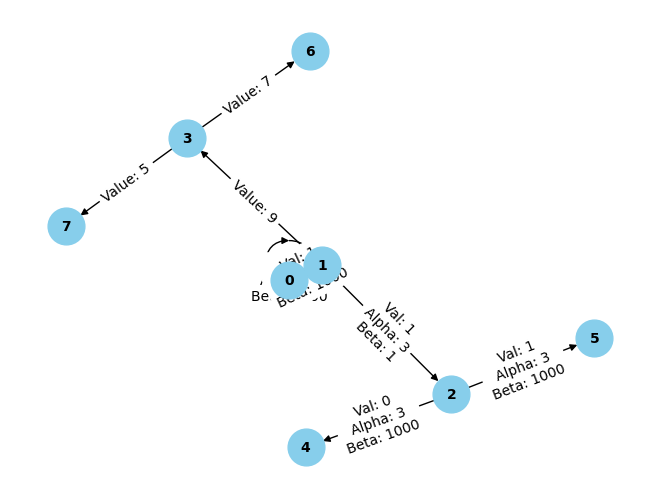

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

MAX, MIN = 1000, -1000

def minimax(depth, nodeIndex, maximizer, values, alpha, beta, G): 
    if depth == 3: 
        return values[nodeIndex] 

    if maximizer: 
        best = MIN
        for i in range(2): 
            val = minimax(depth + 1, nodeIndex * 2 + i, False, values, alpha, beta, G)
            best = max(best, val)
            alpha = max(alpha, best)

            G.add_edge(nodeIndex, nodeIndex * 2 + i, label=f"Val: {val}\nAlpha: {alpha}\nBeta: {beta}")
            
            if beta <= alpha:
                break
        return best 

    else:
        best = MAX
        for i in range(2): 
            val = minimax(depth + 1, nodeIndex * 2 + i, True, values, alpha, beta, G)
            best = min(best, val)
            beta = min(beta, best)

            G.add_edge(nodeIndex, nodeIndex * 2 + i, label=f"Val: {val}\nAlpha: {alpha}\nBeta: {beta}")
            
            if beta <= alpha:
                break
        return best 

def generate_and_traverse_graph(values):
    G = nx.DiGraph()
    
    # Generate the tree graph
    for i, val in enumerate(values):
        parent_node = i // 2
        G.add_node(i, label=f"Node: {i}\nValue: {val}")
        if parent_node >= 0:
            G.add_edge(parent_node, i, label=f"Value: {val}")

    # Traverse the graph with minimax
    minimax(0, 0, True, values, MIN, MAX, G)

    # Plot the graph
    pos = nx.spring_layout(G)
    labels = nx.get_edge_attributes(G, 'label')
    
    nx.draw(G, pos, with_labels=True, node_size=700, node_color="skyblue", font_size=10, font_color="black", font_weight="bold")
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
    
    plt.show()

if __name__ == "__main__": 
    values = [2, 3, 5, 9, 0, 1, 7, 5]  
    generate_and_traverse_graph(values)
